In [28]:
import yfinance as yf
import pandas as pd 
import sklearn.model_selection as sk
import numpy as np
import matplotlib.pyplot as plt

In [29]:
data = yf.download(' aapl ',period="7D",interval="1m")
data=data.rename({"High":"high","Low":"low","Close":"close","Open":"open","Adj Close":"adj close","Volume":"volume"},axis=1)


data=pd.DataFrame(data["close"])
data

[*********************100%%**********************]  1 of 1 completed


,close
Datetime,
2023-09-14 09:30:00-04:00,173.872803
2023-09-14 09:31:00-04:00,173.660004
2023-09-14 09:32:00-04:00,174.179993
2023-09-14 09:33:00-04:00,174.339996
2023-09-14 09:34:00-04:00,174.272903
...,...
2023-09-22 10:58:00-04:00,176.475006
2023-09-22 10:59:00-04:00,176.479996
2023-09-22 11:00:00-04:00,176.475006


In [30]:
from copy import deepcopy as dc
def prepareforlstm(df,loookback):
    df=pd.DataFrame(df["close"])
    df=dc(df)
    for i in range(1,loookback+1):
        df[f'close(t-{i})']=df["close"].shift(i)
    df.dropna(inplace=True)
    return df

In [31]:
lookback=30

In [32]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(-1,1))
df1=pd.DataFrame(scalar.fit_transform(data),index=data.index.tolist())
for i in range(1,lookback+1):
    df1=df1.rename({i:f'close(t-{i})'},axis=1)
df1=df1.rename({0:"close"},axis=1)
df1.index.rename("ds",inplace=True)
df1.reset_index(inplace=True)
shifted_df=prepareforlstm(df1,lookback)
shifted_df

,close,close(t-1),close(t-2),close(t-3),close(t-4),close(t-5),close(t-6),close(t-7),close(t-8),close(t-9),...,close(t-21),close(t-22),close(t-23),close(t-24),close(t-25),close(t-26),close(t-27),close(t-28),close(t-29),close(t-30)
30,-0.441797,-0.420341,-0.514951,-0.528782,-0.647460,-0.569495,-0.549151,-0.576271,-0.474575,-0.588509,...,-0.549151,-0.538305,-0.567798,-0.689832,-0.762713,-0.792237,-0.769494,-0.823732,-1.000000,-0.927865
31,-0.511863,-0.441797,-0.420341,-0.514951,-0.528782,-0.647460,-0.569495,-0.549151,-0.576271,-0.474575,...,-0.454237,-0.549151,-0.538305,-0.567798,-0.689832,-0.762713,-0.792237,-0.769494,-0.823732,-1.000000
32,-0.555933,-0.511863,-0.441797,-0.420341,-0.514951,-0.528782,-0.647460,-0.569495,-0.549151,-0.576271,...,-0.389829,-0.454237,-0.549151,-0.538305,-0.567798,-0.689832,-0.762713,-0.792237,-0.769494,-0.823732
33,-0.563629,-0.555933,-0.511863,-0.441797,-0.420341,-0.514951,-0.528782,-0.647460,-0.569495,-0.549151,...,-0.387118,-0.389829,-0.454237,-0.549151,-0.538305,-0.567798,-0.689832,-0.762713,-0.792237,-0.769494
34,-0.613595,-0.563629,-0.555933,-0.511863,-0.441797,-0.420341,-0.514951,-0.528782,-0.647460,-0.569495,...,-0.481252,-0.387118,-0.389829,-0.454237,-0.549151,-0.538305,-0.567798,-0.689832,-0.762713,-0.792237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2428,-0.045761,-0.064371,-0.079661,-0.050845,-0.105694,-0.137288,-0.115253,-0.132203,-0.114710,-0.123731,...,-0.223187,-0.199999,-0.189830,-0.225422,-0.308476,-0.315257,-0.366134,-0.401695,-0.452271,-0.501694
2429,-0.044069,-0.045761,-0.064371,-0.079661,-0.050845,-0.105694,-0.137288,-0.115253,-0.132203,-0.114710,...,-0.206780,-0.223187,-0.199999,-0.189830,-0.225422,-0.308476,-0.315257,-0.366134,-0.401695,-0.452271
2430,-0.045761,-0.044069,-0.045761,-0.064371,-0.079661,-0.050845,-0.105694,-0.137288,-0.115253,-0.132203,...,-0.200677,-0.206780,-0.223187,-0.199999,-0.189830,-0.225422,-0.308476,-0.315257,-0.366134,-0.401695
2431,-0.079661,-0.045761,-0.044069,-0.045761,-0.064371,-0.079661,-0.050845,-0.105694,-0.137288,-0.115253,...,-0.240680,-0.200677,-0.206780,-0.223187,-0.199999,-0.189830,-0.225422,-0.308476,-0.315257,-0.366134


In [33]:
df1

,ds,close
0,2023-09-14 09:30:00-04:00,-0.927865
1,2023-09-14 09:31:00-04:00,-1.000000
2,2023-09-14 09:32:00-04:00,-0.823732
3,2023-09-14 09:33:00-04:00,-0.769494
4,2023-09-14 09:34:00-04:00,-0.792237
...,...,...
2428,2023-09-22 10:58:00-04:00,-0.045761
2429,2023-09-22 10:59:00-04:00,-0.044069
2430,2023-09-22 11:00:00-04:00,-0.045761
2431,2023-09-22 11:01:00-04:00,-0.079661


In [34]:
split_index=len(shifted_df)-15

In [35]:
train=shifted_df.iloc[:split_index,:]
test=shifted_df.iloc[split_index:,:]

In [36]:
train

,close,close(t-1),close(t-2),close(t-3),close(t-4),close(t-5),close(t-6),close(t-7),close(t-8),close(t-9),...,close(t-21),close(t-22),close(t-23),close(t-24),close(t-25),close(t-26),close(t-27),close(t-28),close(t-29),close(t-30)
30,-0.441797,-0.420341,-0.514951,-0.528782,-0.647460,-0.569495,-0.549151,-0.576271,-0.474575,-0.588509,...,-0.549151,-0.538305,-0.567798,-0.689832,-0.762713,-0.792237,-0.769494,-0.823732,-1.000000,-0.927865
31,-0.511863,-0.441797,-0.420341,-0.514951,-0.528782,-0.647460,-0.569495,-0.549151,-0.576271,-0.474575,...,-0.454237,-0.549151,-0.538305,-0.567798,-0.689832,-0.762713,-0.792237,-0.769494,-0.823732,-1.000000
32,-0.555933,-0.511863,-0.441797,-0.420341,-0.514951,-0.528782,-0.647460,-0.569495,-0.549151,-0.576271,...,-0.389829,-0.454237,-0.549151,-0.538305,-0.567798,-0.689832,-0.762713,-0.792237,-0.769494,-0.823732
33,-0.563629,-0.555933,-0.511863,-0.441797,-0.420341,-0.514951,-0.528782,-0.647460,-0.569495,-0.549151,...,-0.387118,-0.389829,-0.454237,-0.549151,-0.538305,-0.567798,-0.689832,-0.762713,-0.792237,-0.769494
34,-0.613595,-0.563629,-0.555933,-0.511863,-0.441797,-0.420341,-0.514951,-0.528782,-0.647460,-0.569495,...,-0.481252,-0.387118,-0.389829,-0.454237,-0.549151,-0.538305,-0.567798,-0.689832,-0.762713,-0.792237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413,-0.210168,-0.199999,-0.240680,-0.240680,-0.200677,-0.206780,-0.223187,-0.199999,-0.189830,-0.225422,...,-0.552545,-0.593221,-0.583052,-0.536541,-0.562714,-0.553119,-0.583052,-0.559321,-0.538982,-0.508475
2414,-0.189830,-0.210168,-0.199999,-0.240680,-0.240680,-0.200677,-0.206780,-0.223187,-0.199999,-0.189830,...,-0.471187,-0.552545,-0.593221,-0.583052,-0.536541,-0.562714,-0.553119,-0.583052,-0.559321,-0.538982
2415,-0.213561,-0.189830,-0.210168,-0.199999,-0.240680,-0.240680,-0.200677,-0.206780,-0.223187,-0.199999,...,-0.425426,-0.471187,-0.552545,-0.593221,-0.583052,-0.536541,-0.562714,-0.553119,-0.583052,-0.559321
2416,-0.183049,-0.213561,-0.189830,-0.210168,-0.199999,-0.240680,-0.240680,-0.200677,-0.206780,-0.223187,...,-0.464406,-0.425426,-0.471187,-0.552545,-0.593221,-0.583052,-0.536541,-0.562714,-0.553119,-0.583052


In [37]:
"""from gluonts.dataset.pandas import PandasDataset

train_ds = PandasDataset.from_long_dataframe(train, target='close', item_id=["close(t-1)"	,"close(t-2)",	"close(t-3)",	"close(t-4)",	"close(t-5)",	"close(t-6)",	"close(t-7)"], 
                                       timestamp='ds', freq='1m')"""

'from gluonts.dataset.pandas import PandasDataset\n\ntrain_ds = PandasDataset.from_long_dataframe(train, target=\'close\', item_id=["close(t-1)"\t,"close(t-2)",\t"close(t-3)",\t"close(t-4)",\t"close(t-5)",\t"close(t-6)",\t"close(t-7)"], \n                                       timestamp=\'ds\', freq=\'1m\')'

In [38]:
from gluonts.dataset.common import ListDataset

In [39]:
training_data = ListDataset(
    [{"start": "2023-09-12 09:37:00-04:0001-01-2015 00:00" , "target": train.close}],
    freq = "1min"
)

In [40]:
training_data

[{'start': Period('2023-09-12 00:00', 'T'),
  'target': array([-0.44179672, -0.51186305, -0.5559326 , ..., -0.21356119,
         -0.18304875, -0.13898444], dtype=float32)}]

In [41]:
from gluonts.torch.model.deepar import DeepAREstimator
estimator = DeepAREstimator(freq='1m', prediction_length=len(test), trainer_kwargs={'accelerator': 'gpu', 'max_epochs':30},batch_size=32,num_batches_per_epoch=16)

predictor = estimator.train(training_data)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/batuhan-saylam/miniconda3/envs/tf/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:71: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type        | Params | In sizes | Out sizes   
----------------------------------------------------------------
0 | model | DeepARModel | 23.3 K | ?        | [1, 100, 15]
----------------------------------------------------------------
23.3 K    Trainable params
0         Non-trainable params
23.3 K    Total params
0.093     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Epoch 0, global step 16: 'train_loss' reached 0.44754 (best 0.44754), saving model to '/home/batuhan-saylam/Downloads/lightning_logs/version_1/checkpoints/epoch=0-step=16.ckpt' as top 1
Epoch 1, global step 32: 'train_loss' reached -0.05236 (best -0.05236), saving model to '/home/batuhan-saylam/Downloads/lightning_logs/version_1/checkpoints/epoch=1-step=32.ckpt' as top 1
Epoch 2, global step 48: 'train_loss' reached -0.30406 (best -0.30406), saving model to '/home/batuhan-saylam/Downloads/lightning_logs/version_1/checkpoints/epoch=2-step=48.ckpt' as top 1
Epoch 3, global step 64: 'train_loss' reached -0.62571 (best -0.62571), saving model to '/home/batuhan-saylam/Downloads/lightning_logs/version_1/checkpoints/epoch=3-step=64.ckpt' as top 1
Epoch 4, global step 80: 'train_loss' reached -0.80573 (best -0.80573), saving model to '/home/batuhan-saylam/Downloads/lightning_logs/version_1/checkpoints/epoch=4-step=80.ckpt' as top 1
Epoch 5, global step 96: 'train_loss' reached -0.95813 (best -

In [42]:
pred = list(predictor.predict(training_data))

In [43]:
pred

[gluonts.model.forecast.SampleForecast(info=None, item_id=None, samples=array([[-0.20603202, -0.22313894, -0.22461319, ..., -0.26437354,
         -0.2677773 , -0.26134223],
        [-0.21331488, -0.22007446, -0.21629311, ..., -0.21189937,
         -0.22856581, -0.26906568],
        [-0.21993744, -0.25904074, -0.27523407, ..., -0.3417712 ,
         -0.2941607 , -0.25702634],
        ...,
        [-0.23729299, -0.25546813, -0.1481427 , ..., -0.26545134,
         -0.2625653 , -0.25144812],
        [-0.37596786, -0.27068222, -0.25739008, ..., -0.29645646,
         -0.2926457 , -0.30744642],
        [-0.21224758, -0.2200056 , -0.20618202, ..., -0.28055373,
         -0.27472016, -0.26750734]], dtype=float32), start_date=Period('2023-09-13 15:48', 'T'))]

In [44]:
all_preds = list()
for item in pred:
    p = item.samples.mean(axis=0)
    p10 = np.percentile(item.samples, 10, axis=0)
    p90 = np.percentile(item.samples, 90, axis=0)
    dates = pd.date_range(start="2023-09-19 12:34:00-04:00", periods=len(p), freq='min')
    family_pred = pd.DataFrame({'date': dates, 'pred': p, 'p10': p10, 'p90': p90})
    all_preds += [family_pred]
all_preds = pd.concat(all_preds, ignore_index=True)



In [45]:
all_preds

,date,pred,p10,p90
0,2023-09-19 12:34:00-04:00,-0.220578,-0.242451,-0.192134
1,2023-09-19 12:35:00-04:00,-0.225205,-0.259229,-0.197614
2,2023-09-19 12:36:00-04:00,-0.227121,-0.257230,-0.194516
3,2023-09-19 12:37:00-04:00,-0.232890,-0.259099,-0.206976
4,2023-09-19 12:38:00-04:00,-0.238581,-0.267493,-0.208883
5,2023-09-19 12:39:00-04:00,-0.244987,-0.275413,-0.217676
6,2023-09-19 12:40:00-04:00,-0.259918,-0.291863,-0.234278
7,2023-09-19 12:41:00-04:00,-0.267304,-0.295746,-0.238503
8,2023-09-19 12:42:00-04:00,-0.268612,-0.299610,-0.234267
9,2023-09-19 12:43:00-04:00,-0.270645,-0.296051,-0.230247


In [46]:
all_preds.reset_index(inplace=True)

In [47]:
df=all_preds.iloc[:,2:]
df

,pred,p10,p90
0,-0.220578,-0.242451,-0.192134
1,-0.225205,-0.259229,-0.197614
2,-0.227121,-0.257230,-0.194516
3,-0.232890,-0.259099,-0.206976
4,-0.238581,-0.267493,-0.208883
5,-0.244987,-0.275413,-0.217676
6,-0.259918,-0.291863,-0.234278
7,-0.267304,-0.295746,-0.238503
8,-0.268612,-0.299610,-0.234267
9,-0.270645,-0.296051,-0.230247


In [48]:
predict=pd.DataFrame(scalar.inverse_transform(df),columns= ["pred","p10","p90"])

In [49]:
predict

,pred,p10,p90
0,175.959296,175.894770,176.043205
1,175.945646,175.845276,176.027041
2,175.939994,175.851173,176.036178
3,175.922976,175.845660,175.999422
4,175.906186,175.820896,175.993797
5,175.887290,175.797534,175.967857
6,175.843243,175.749006,175.918881
7,175.821455,175.737552,175.906417
8,175.817596,175.726152,175.918913
9,175.811599,175.736652,175.930774


In [50]:
split_index2=len(data)-15

In [51]:
test=data.iloc[split_index2:,:]

In [52]:
test

,close
Datetime,
2023-09-22 10:48:00-04:00,176.320007
2023-09-22 10:49:00-04:00,176.244995
2023-09-22 10:50:00-04:00,176.271606
2023-09-22 10:51:00-04:00,176.220001
2023-09-22 10:52:00-04:00,176.270004
2023-09-22 10:53:00-04:00,176.205002
2023-09-22 10:54:00-04:00,176.298203
2023-09-22 10:55:00-04:00,176.460007
2023-09-22 10:56:00-04:00,176.375000


In [53]:
test.reset_index(inplace=True)

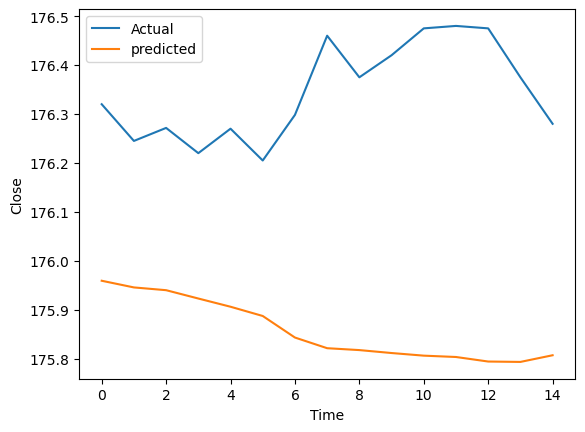

In [54]:
plt.plot(test.loc[:,"close"],label="Actual")
plt.plot(predict["pred"],label='predicted')
plt.xlabel("Time")
plt.ylabel("Close")
plt.legend()
plt.show()